# Simplify Access With Amazon VPC Endpoints

## What is a VPC endpoint?

A VPC endpoint is a logical entity within a VPC that allows connectivity to AWS services, such as Amazon S3. The VPC endpoint routes requests across the Amazon network to S3 and then routes responses back to the VPC. Because the traffic stays on the Amazon network, the endpoint allows you to privately connect to supported AWS services without requiring an internet gateway, NAT device, VPN connection, or AWS Direct Connect connection. Traffic between your VPC and the AWS service does not leave the Amazon network. 

Endpoints are virtual devices that scale horizontally, are highly available, and redundant. They allow communication between your VPC and AWS services without creating availability risks or bandwidth constraints on your network traffic. VPC endpoints use AWS PrivateLink, a technology that you can implement to privately access services by using private IP addresses.

## Types of VPC endpoints

Two types of VPC endpoints are available: Gateway endpoints and interface endpoints. To learn about the different endpoints and the benefits of using each one, select the following tabs.

### Gateway Endpoints
Gateway endpoints support both Amazon S3 and Amazon DynamoDB. Gateway endpoints are specified in your route table and use the route prefix to direct traffic destined for S3 or DynamoDB to the gateway endpoint. 



Using a gateway endpoint provides a way to access S3 buckets without your data traversing the internet. Requests stay within the AWS network. This keeps private subnets secure because you do not have to add an internet gateway or NAT instance to access S3 data. A private subnet does not have a route to the internet.

### Gateway Endpoints Benefits
- Reduce data transfer charges resulting from outbound network communication between VPC and services that require public AWS services, such as S3
- Security in depth using IAM, Gateway Endpoint policies, and S3 bucket policies 
- Compliance and regulatory adherence, as data does not leave the Amazon network

### Interface Endpoints
An interface endpoint is an elastic network interface (network interface) with a private IP address from the IP address range of your subnet. It serves as an entry point for traffic destined to supported AWS services or to a VPC endpoint service. 



Interface endpoints can easily extend your on-premises networks to connect to your VPC and S3. This reduces the need to operate fleets of proxy servers in your VPC that allow on-premises applications to send data to the private IP of the proxy servers that forward the requests to S3. With interface endpoints, those on-premises applications can send data to the private IP of an interface endpoint. Doing this lessens the added complexity and point-of-failure of the proxy server fleets.

### Interface Endpoint Benefits
- Reduce data transfer charges resulting from outbound network communication between VPC and services that require public AWS services
- Security and easy access control using VPC endpoint policies
- Applications in an Amazon VPC can securely access AWS PrivateLink endpoints across AWS Regions using inter-Region VPC peering 
- Simplifies on-premises network and firewall configuration for S3 access. No longer requires public IPs or an internet gateway
- Reduce the need to build self-managed proxy servers with private IPs for S3 access from on-premises applications

## Feature comparison

The following table is a comparison of the supported features between a gateway endpoint and an interface endpoint. 

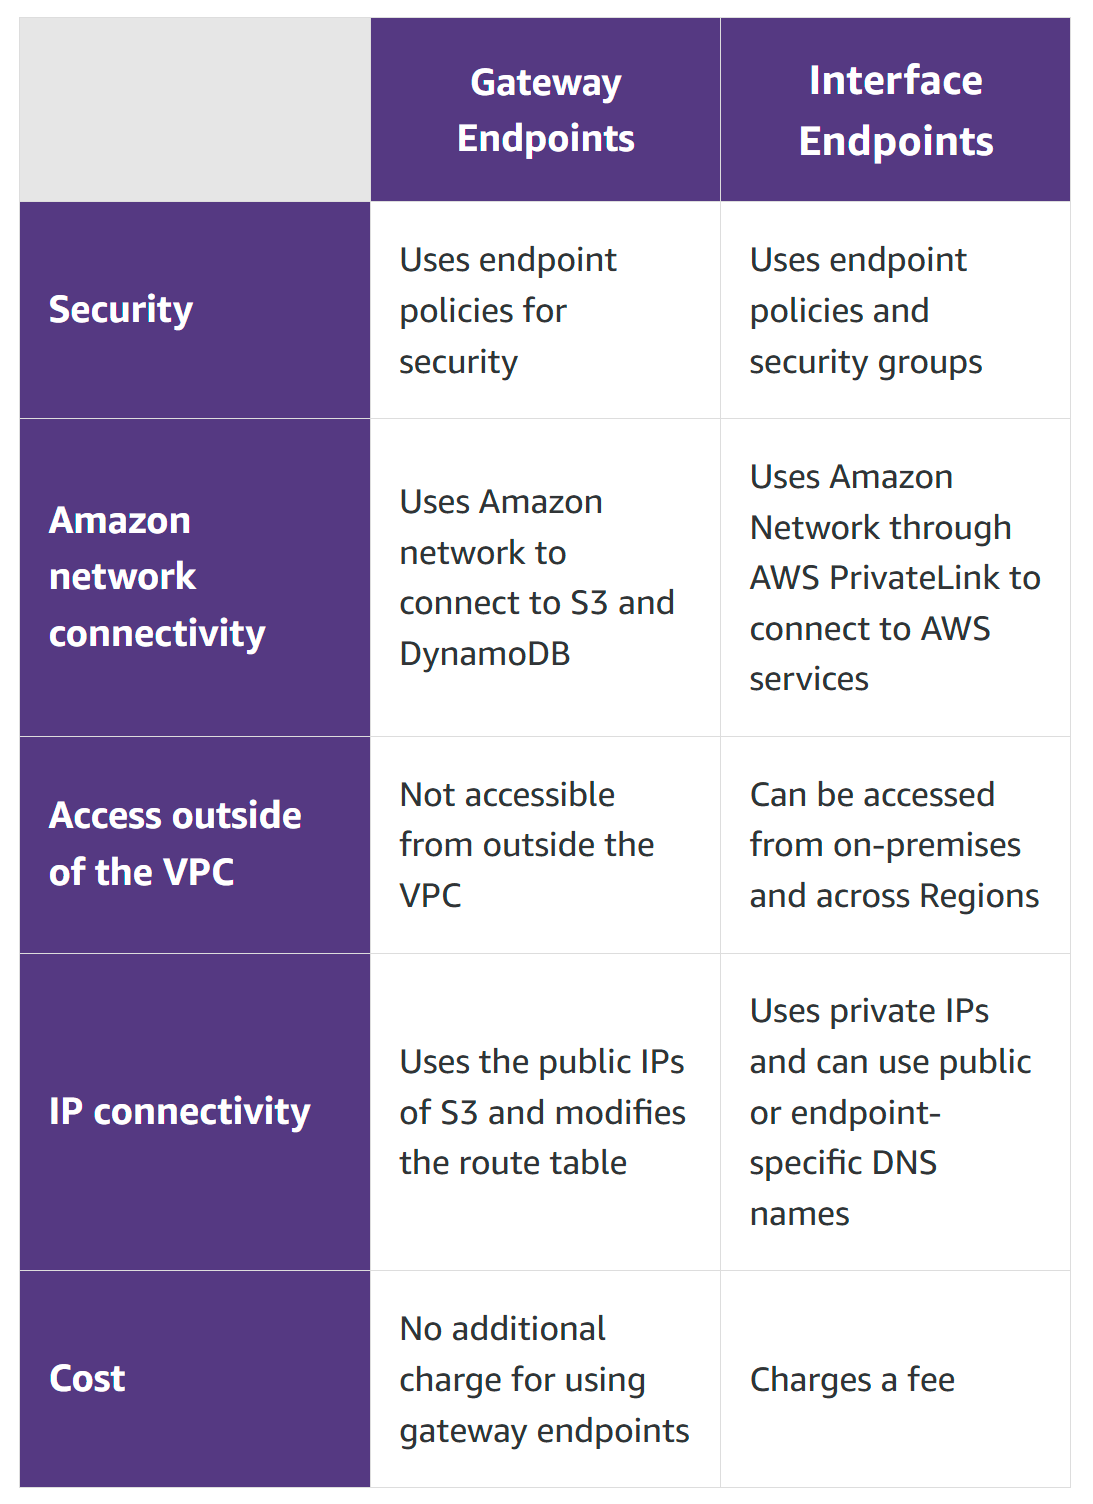

## How do gateway endpoints work?

Gateway endpoints work by connecting the specific VPC with the resource (Amazon S3 or DynamoDB) to which it connects. You then add a route in the route table to include the Destination as the service prefix id and the Target as the endpoint ID. After the route is added, any request for Amazon S3 is routed to the endpoint that connects to S3. If the subnet is associated with the modified route table, the subnet is automatically granted access to the endpoint. The default policy automatically grants access to authenticated principals while any security group in use must add a specific rule that allows outbound traffic to the endpoint.

The following diagram illustrates the routing of requests to S3 using an endpoint. 

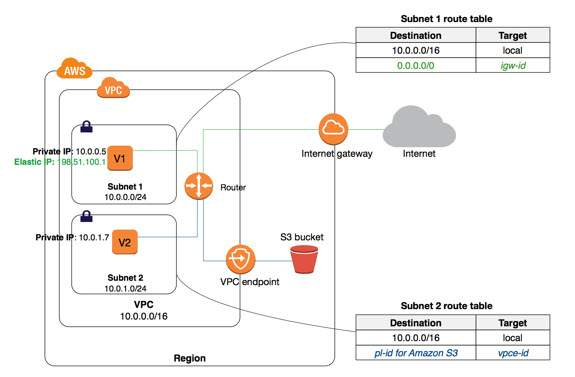

## Access control using endpoint policies

An endpoint policy is an IAM resource policy attached to an endpoint. The endpoint policy controls the requests, users, or groups that are allowed access through the endpoint. The following are important details about the endpoint policy:


- The endpoint policy explicitly denies access to any actions not listed in the policy.


- If you do not attach a policy at endpoint creation, the default policy is attached and allows full access to the AWS service.


- If a service does not support endpoint policies, the endpoint allows full access to the service. 


- An endpoint policy does not override or replace IAM user policies or service-specific policies (such as S3 bucket policies). It is a separate policy for controlling access from the endpoint to the specified service.


- You cannot attach more than one policy to an endpoint. However, you can modify the policy at any time. If you do modify a policy, it can take a few minutes for the changes to take effect.

## Example: Controlling access to buckets from specified VPC endpoints

Access to the S3 buckets can also be controlled using S3 bucket policies. You can use a bucket policy to control access to the bucket from only specified VPC endpoints or specific VPCs. It is a best practice to restrict access only to those VPCs or endpoints that require access.

The following is an example of an Amazon S3 bucket policy that restricts access to the finance bucket to only the VPC endpoint with the vpce-1a2b3c4d ID. The policy denies all access to the bucket if the specified endpoint is not being used. To learn more, choose the markers (>) on the following code example.

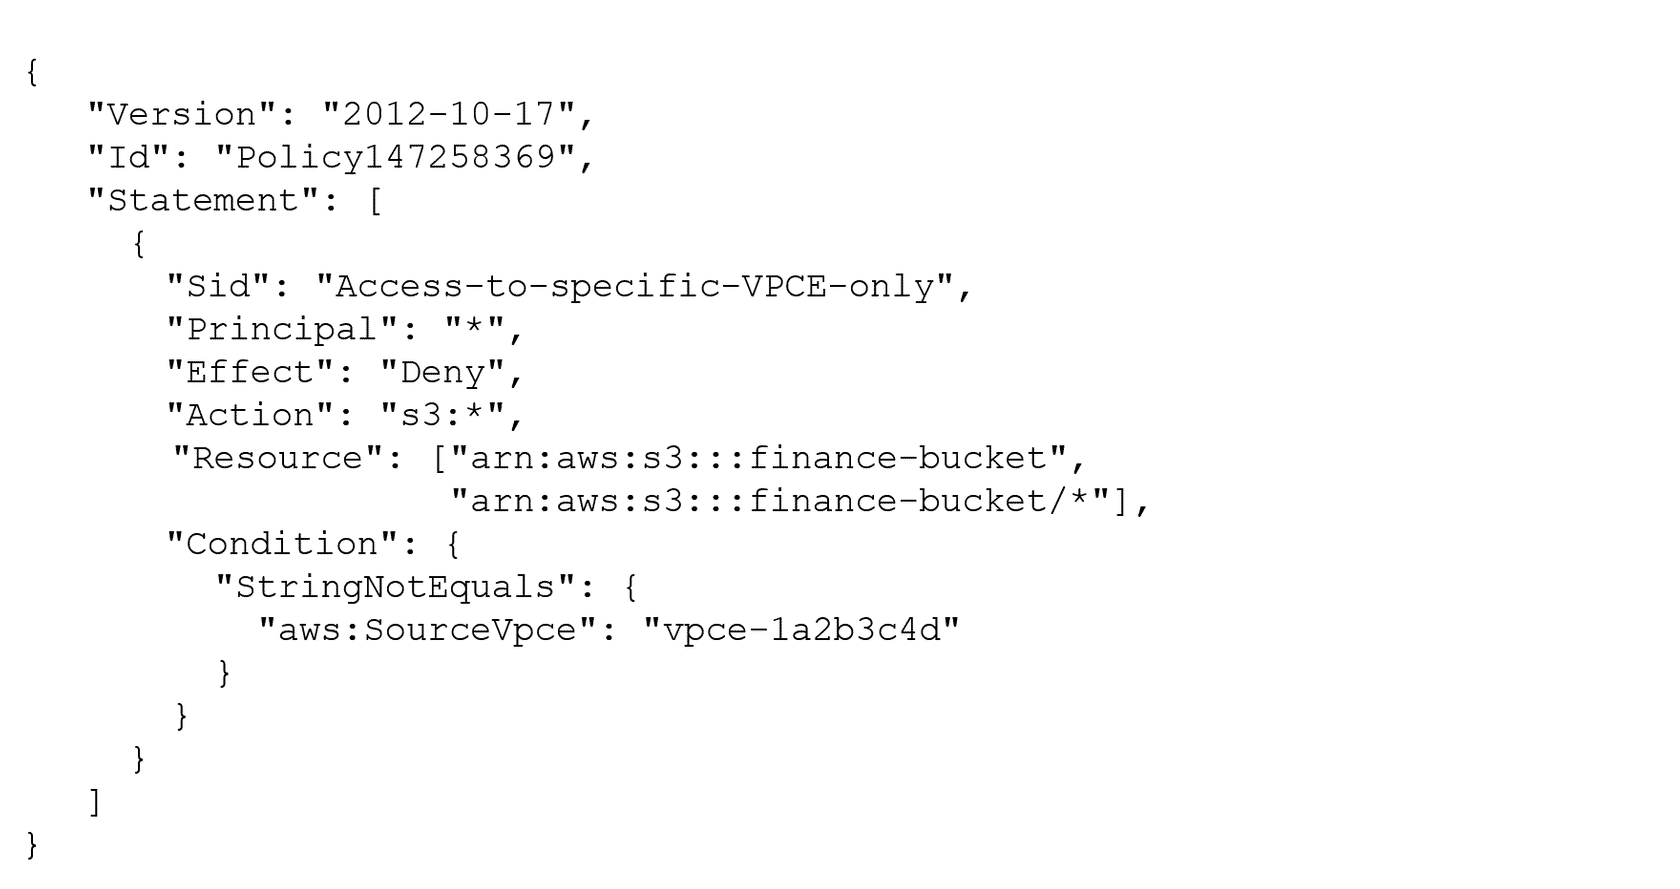

## Interface endpoints

An interface endpoint is an elastic network interface with a private IP address from the IP address range of your subnet. This extends the functionality of existing gateway endpoints by allowing you to access S3 using private IP addresses. Additionally, any API requests and HTTPS requests to S3 from your on-premises applications are automatically directed through interface endpoints. These endpoints connect to S3 securely and privately through PrivateLink.

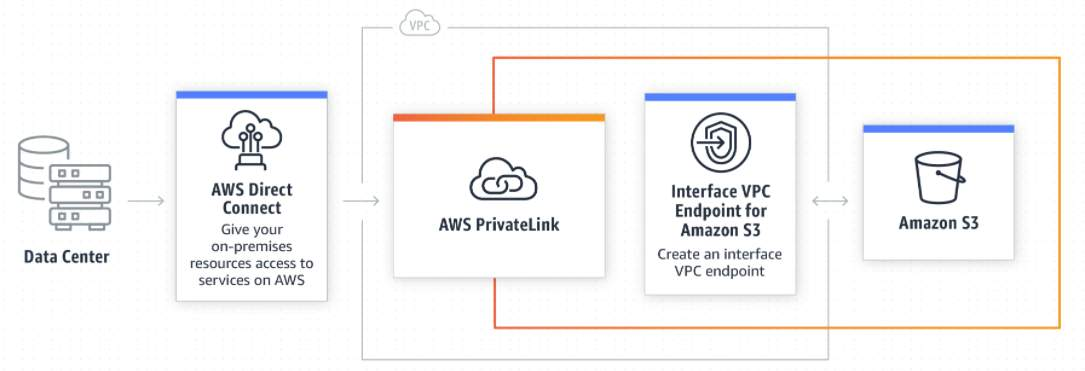

Security groups are associated with the endpoint network interface. The security group rules control the traffic to the endpoint network interface from resources in your VPC. Outside services cannot initiate requests to resources in your VPC through an endpoint. An endpoint returns responses only to traffic that is initiated from resources within your VPC. 

When using private DNS and endpoint-specific hostnames, all traffic to the service is directed to the interface endpoint instead of through a default route, such as through a NAT gateway or public IP address. Using private DNS keeps the traffic destined for the service contained securely within the Amazon network.

The following diagram illustrates the routing of requests to S3 using a private DNS endpoint hostname. 

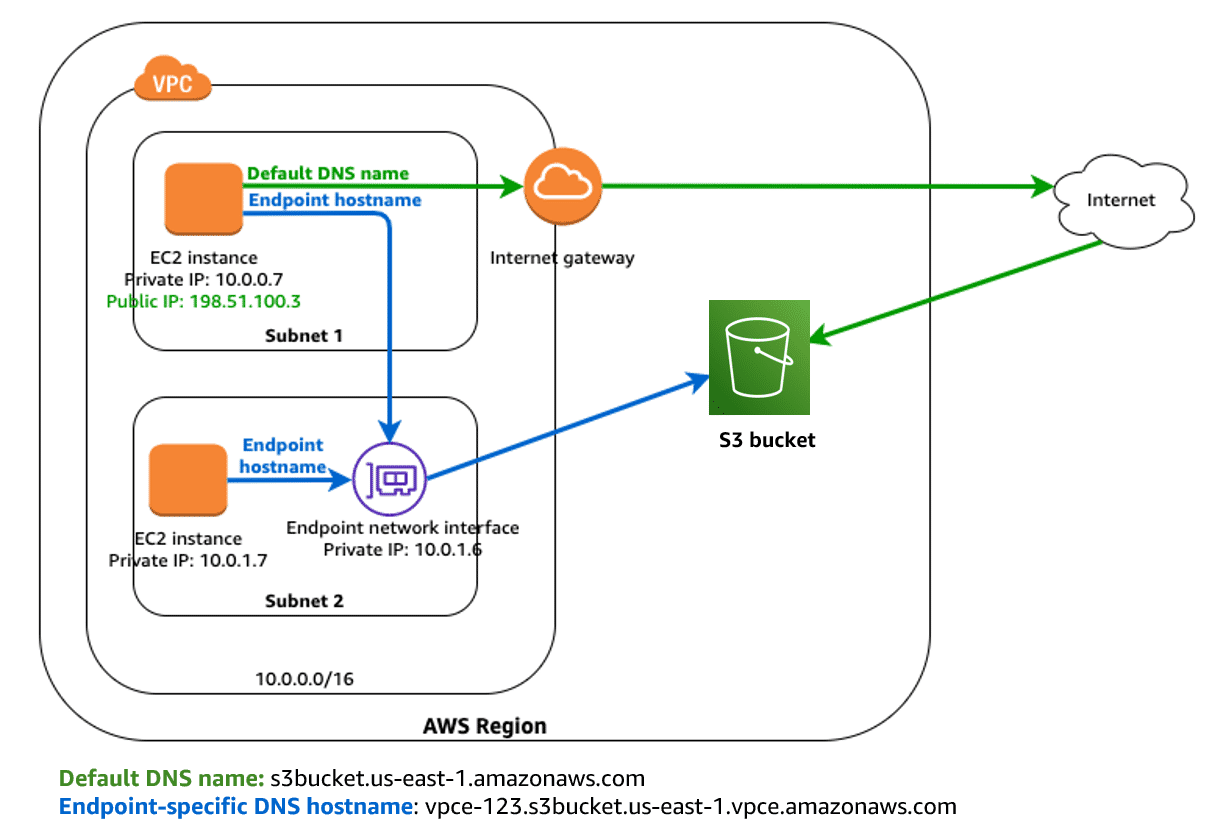

## On-premises connectivity

Interface endpoints in your VPC can route traffic for both in-VPC applications and on-premises applications to Amazon S3 over the Amazon network.

The following diagram illustrates the routing of requests from an on-premises application to Amazon S3. It also shows in-VPC applications routing through the same endpoint. 

To learn more, choose each number on the diagram.

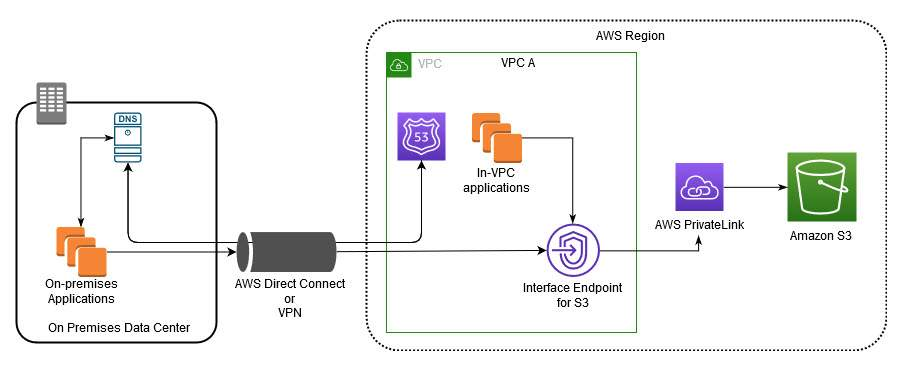

## Securing endpoints

A VPC endpoint policy is an IAM resource policy that you can attach to an endpoint. It is a separate policy for controlling access from the endpoint to the specified service. This enables granular access control and private network connectivity from within a VPC. For example, you could create a policy that restricts access to a specific S3 bucket coming from a specific VPC endpoint. You can secure gateway endpoints in three locations: on the service, on the endpoint, and on the S3 bucket. When using endpoint policies, AWS evaluates all the policies and applies the most restrictive set. For ease of management, it is a best practice to manage permissions using the endpoint policy and then set the S3 bucket to only accept connections from the appropriate access point. In this case, AWS applies the more restrictive endpoint policy. You must manage and maintain only the policies for the endpoint.

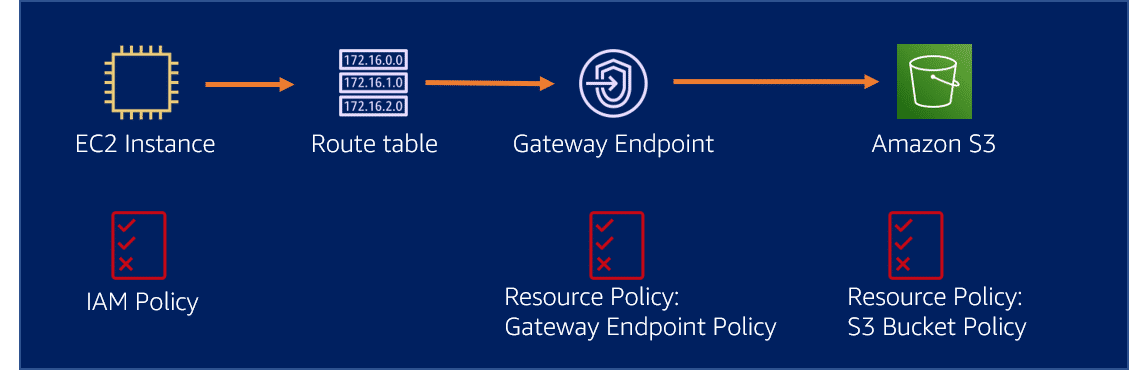

Like gateway endpoints, interface endpoints can be secured using resource policies on the endpoint itself and the resource that the endpoint provides access to. Interface endpoints enable the use of security groups to restrict access to the endpoint. 

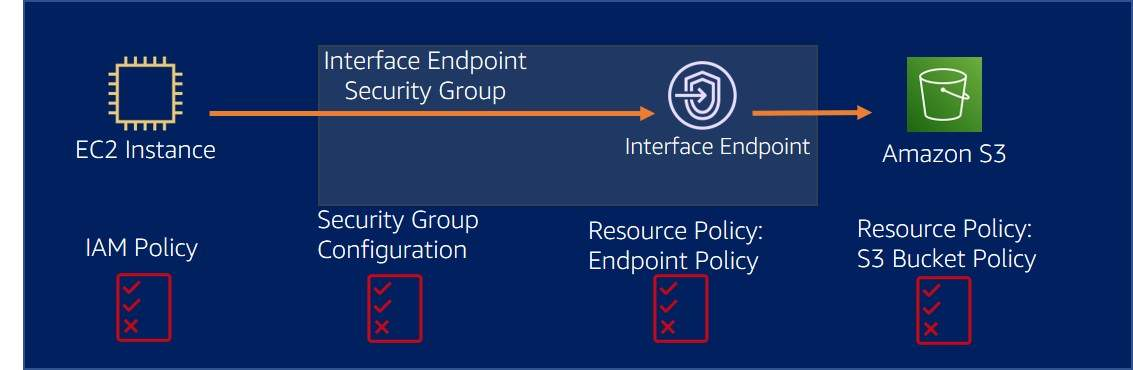

You've covered how to secure access to the buckets using bucket policies and how to use and secure endpoints to keep your data in transit secure. The final piece is to learn how to secure and monitor information in your data stored in S3 buckets. What can you do to ensure and protect the personal and business critical information stored in your data? Scroll down to learn more.